In [ ]:
# Importing the libraries
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns

# To count the iterations 
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing the dataset
dataset = pd.read_csv('financial_sentiment_data.csv')

##EDA

In [ ]:
dataset.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
dataset.tail()

,Sentence,Sentiment
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral
5841,HELSINKI AFX - KCI Konecranes said it has won ...,positive


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
dataset.duplicated().sum()

6

In [ ]:
dataset.drop_duplicates(subset=['Sentence'],keep='first',inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
dataset['Sentiment'].value_counts()

neutral     2878
positive    1852
negative     592
Name: Sentiment, dtype: int64

In [ ]:
dataset['Sentiment'].value_counts(normalize= True)*100

neutral     54.077415
positive    34.798948
negative    11.123638
Name: Sentiment, dtype: float64

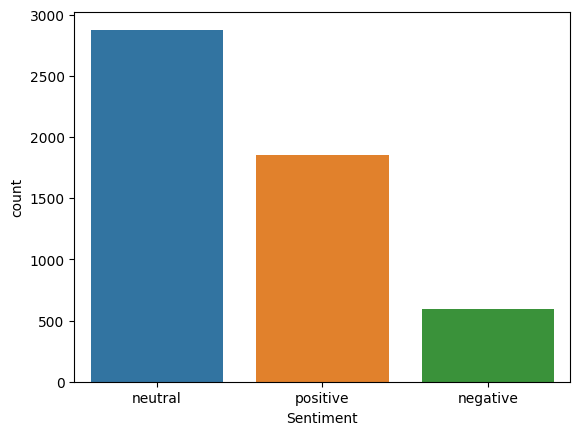

In [ ]:
sns.countplot(data= dataset, x= 'Sentiment',order = dataset['Sentiment'].value_counts().index);

In [ ]:
dataset['length'] = dataset['Sentence'].apply(len)
dataset.head()


,Sentence,Sentiment,length
0,The GeoSolutions technology will leverage Bene...,positive,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55
2,"For the last quarter of 2010 , Componenta 's n...",positive,193
3,According to the Finnish-Russian Chamber of Co...,neutral,128
4,The Swedish buyout firm has sold its remaining...,neutral,135


In [ ]:
dataset.length.describe()

count    5322.000000
mean      116.123638
std        56.508924
min         9.000000
25%        71.000000
50%       106.000000
75%       150.000000
max       315.000000
Name: length, dtype: float64

##Text Preprocessing

In [ ]:
def removeHTMLTags(Sentence):
    soup = BeautifulSoup(Sentence, 'lxml')
    return soup.get_text()

In [ ]:
def removeApostrophe(Sentence):
    phrase = re.sub(r"won't", "will not", Sentence)
    phrase = re.sub(r"can\'t", "can not", Sentence)
    phrase = re.sub(r"n\'t", " not", Sentence)
    phrase = re.sub(r"\'re", " are", Sentence)
    phrase = re.sub(r"\'s", " is", Sentence)
    phrase = re.sub(r"\'d", " would", Sentence)
    phrase = re.sub(r"\'ll", " will", Sentence)
    phrase = re.sub(r"\'t", " not", Sentence)
    phrase = re.sub(r"\'ve", " have", Sentence)
    phrase = re.sub(r"\'m", " am", Sentence)
    return phrase

In [ ]:
def removeAlphaNumericWords(Sentence):
     return re.sub("\S*\d\S*", "", Sentence).strip()

In [ ]:
def removeSpecialChars(Sentence):
     return re.sub('[^a-zA-Z]', ' ', Sentence)

In [ ]:
def doTextCleaning(Sentence):
    Sentence = removeHTMLTags(Sentence)
    Sentence = removeApostrophe(Sentence)
    Sentence = removeAlphaNumericWords(Sentence)
    Sentence = removeSpecialChars(Sentence) 
    # Lower casing
    Sentence = Sentence.lower()  
    #Tokenization
    Sentence = Sentence.split()
    #Removing Stopwords and Lemmatization
    lmtzr = WordNetLemmatizer()
    Sentence = [lmtzr.lemmatize(word, 'v') for word in Sentence if not word in set(stopwords.words('english'))]
    Sentence = " ".join(Sentence)    
    return Sentence

In [ ]:
def removeHTMLTags(Sentence):
    soup = BeautifulSoup(Sentence, 'lxml')
    return soup.get_text()
    phrase = re.sub(r"won't", "will not", Sentence)
    phrase = re.sub(r"can\'t", "can not", Sentence)
    phrase = re.sub(r"n\'t", " not", Sentence)
    phrase = re.sub(r"\'re", " are", Sentence)
    phrase = re.sub(r"\'s", " is", Sentence)
    phrase = re.sub(r"\'d", " would", Sentence)
    phrase = re.sub(r"\'ll", " will", Sentence)
    phrase = re.sub(r"\'t", " not", Sentence)
    phrase = re.sub(r"\'ve", " have", Sentence)
    phrase = re.sub(r"\'m", " am", Sentence)
    return phrase

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
corpus = []   
for index, row in tqdm(dataset.iterrows()):
    Sentence = doTextCleaning(row['Sentence'])
    corpus.append(Sentence)

5322it [00:19, 274.13it/s]


In [ ]:
dataset['clean_text'] = corpus

In [ ]:
dataset.head()

,Sentence,Sentiment,length,clean_text
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,last quarter componenta net sales double perio...
3,According to the Finnish-Russian Chamber of Co...,neutral,128,accord finnish russian chamber commerce major ...
4,The Swedish buyout firm has sold its remaining...,neutral,135,swedish buyout firm sell remain percent stake ...


##Visualization

In [ ]:
# Visualize word frequency
from wordcloud import WordCloud
from collections import Counter  
import matplotlib.pyplot as plt  

array([[<Axes: title={'center': 'negative'}>,
        <Axes: title={'center': 'neutral'}>],
       [<Axes: title={'center': 'positive'}>, <Axes: >]], dtype=object)

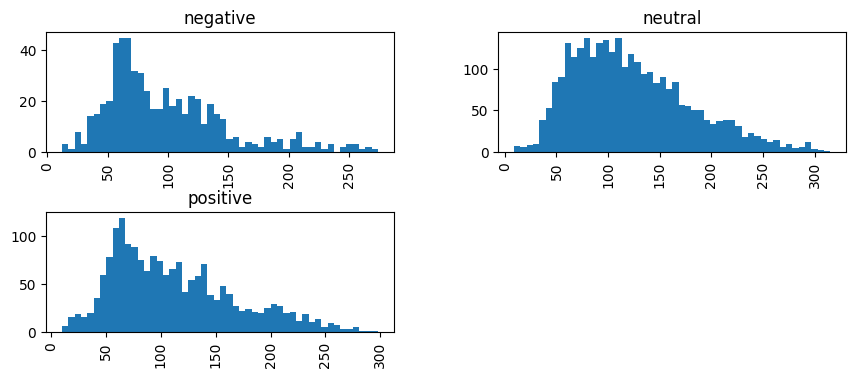

In [ ]:
dataset.hist(column='length', by='Sentiment', bins=50,figsize=(10,4))

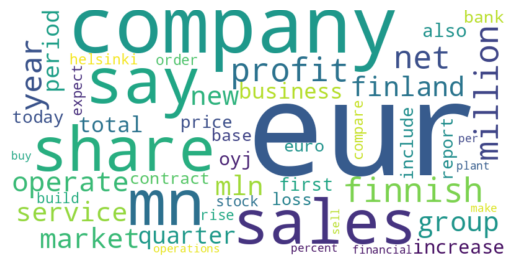

In [ ]:
word_freq = Counter(" ".join(corpus).split()).most_common(50)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
plt.imshow(wordcloud, interpolation='bilinear')
wordcloud.generate('Neutral'.join(dataset.Sentence))
plt.axis('off')
plt.show() 

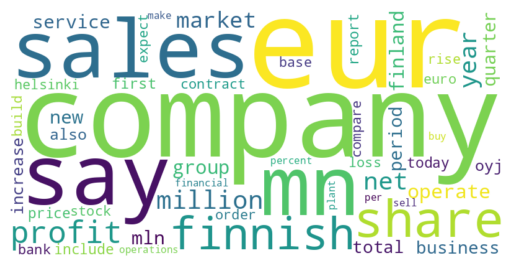

In [ ]:
word_freq = Counter(" ".join(corpus).split()).most_common(50)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
plt.imshow(wordcloud, interpolation='bilinear')
wordcloud.generate('Positive'.join(dataset.Sentence))
plt.axis('off')
plt.show()   

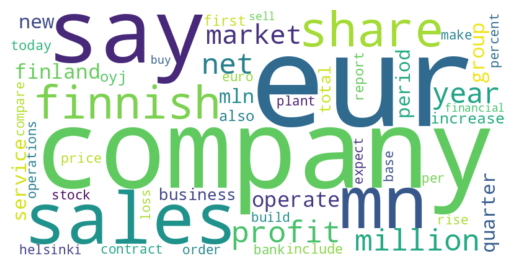

In [ ]:
word_freq = Counter(" ".join(corpus).split()).most_common(50)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
plt.imshow(wordcloud, interpolation='bilinear')
wordcloud.generate('Negative'.join(dataset.Sentence))
plt.axis('off')
plt.show() 

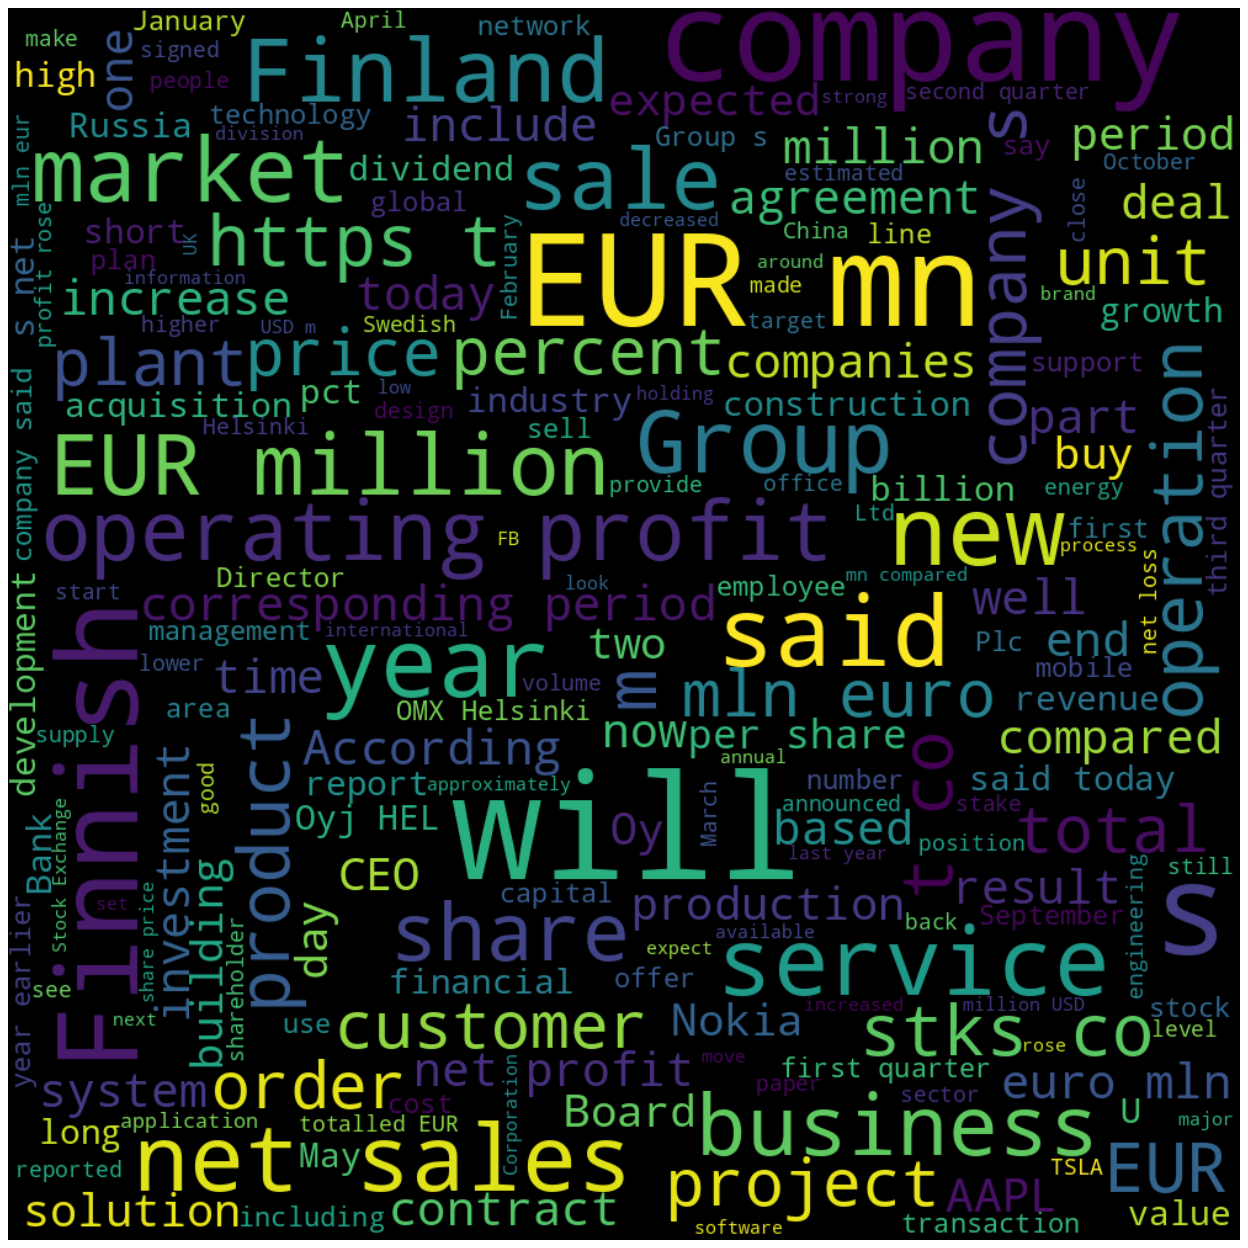

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in dataset["Sentence"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

##Feature engineering

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
dataset.head()

,Sentence,Sentiment,length,clean_text
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,last quarter componenta net sales double perio...
3,According to the Finnish-Russian Chamber of Co...,neutral,128,accord finnish russian chamber commerce major ...
4,The Swedish buyout firm has sold its remaining...,neutral,135,swedish buyout firm sell remain percent stake ...


##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset['Sentiment'] = le.fit_transform(dataset['Sentiment'])
dataset['Sentiment'].value_counts()


1    2878
2    1852
0     592
Name: Sentiment, dtype: int64

In [ ]:
cv = CountVectorizer(ngram_range=(1,1), max_features = 250)
cv_features = cv.fit_transform(dataset['clean_text'])
cv_features.shape

(5322, 250)

In [ ]:
cv_features[0]

<1x250 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

###Train Test Split

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cv_features, dataset['Sentiment'], test_size = 0.20,stratify=dataset['Sentiment'], random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  


0.7037820061075875
0.6882629107981221


In [ ]:
# Unigrams
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
X = dataset['clean_text']
y = dataset['Sentiment']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(ngram_range=(1, 1), min_df=5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1_CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(LR1_CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  

79.83 0.35
72.72 0.43


1887

In [ ]:
from sklearn.metrics import classification_report
LR1_CV_pipe.fit(X,y)
y_predLR=LR1_CV_pipe.predict(X)
reportXGB = classification_report(y, y_predLR.round())
print(reportXGB)

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       592
           1       0.83      0.87      0.85      2878
           2       0.83      0.73      0.77      1852

    accuracy                           0.80      5322
   macro avg       0.76      0.77      0.76      5322
weighted avg       0.80      0.80      0.80      5322



In [ ]:
from xgboost import XGBClassifier
XGB1=XGBClassifier()
CV_pipe = Pipeline([('CV', CV) , ('XGB', XGB1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  

85.22 0.32
73.99 0.38


1887

In [ ]:
from xgboost import XGBClassifier
XGB1=XGBClassifier()
XGB1_CV_pipe = Pipeline([('CV', CV) , ('XGB', XGB1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  

85.22 0.32
73.99 0.38


1887

In [ ]:
XGB1_CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer(min_df=5)),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
from sklearn.metrics import classification_report

y_predXGB=XGB1_CV_pipe.predict(X)
reportXGB = classification_report(y, y_predXGB.round())
print(reportXGB)

              precision    recall  f1-score   support

           0       0.89      0.51      0.65       592
           1       0.81      0.97      0.89      2878
           2       0.90      0.75      0.82      1852

    accuracy                           0.84      5322
   macro avg       0.87      0.74      0.78      5322
weighted avg       0.85      0.84      0.84      5322



In [ ]:
raw_text = ["$SPY wouldn't be surprised to see a green close "]

In [ ]:

prediction = XGB1_CV_pipe.predict(X)
print(prediction)

[1 1 2 ... 1 1 1]


In [ ]:
from sklearn.svm import SVC
SVC1=SVC()
CV_pipe = Pipeline([('CV', CV) , ('XGB', SVC1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  

90.09 0.1
73.22 1.01


1887

Resampling

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset['Sentiment'] = le.fit_transform(dataset['Sentiment'])
dataset['Sentiment'].value_counts()

1    2878
2    1852
0     592
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.utils import resample
df_neutral = dataset[(dataset['Sentiment']==1)] 
df_negative = dataset[(dataset['Sentiment']==0)]
df_positive = dataset[(dataset['Sentiment']==2)]


# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 3130, 
                                 random_state=42)  

df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples= 3130, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
df_final = pd.concat([df_negative_upsampled,df_neutral,df_positive_upsampled])

In [ ]:
df_final.shape

(9138, 4)

In [ ]:
df_final['Sentiment'].value_counts()

0    3130
2    3130
1    2878
Name: Sentiment, dtype: int64

In [ ]:
df_final.head()

,Sentence,Sentiment,length,clean_text
788,$AAPL I am big OUT from this. seems its fallin...,0,64,aapl big seem fall towards
3967,$GPS Gap September Comparable Store Sales -4%,0,45,gps gap september comparable store sales
2185,"European shares plunge, roiled by BHP and oil;...",0,64,european share plunge roil bhp oil hop turn ecb
831,The measures result from weak demand in the sh...,0,67,measure result weak demand shipbuilding industry
480,"In January-November 2009 , the group 's sales ...",0,129,january november group sales total eur mn drop...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

from tensorflow import keras
from keras import layers

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_final['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11100 unique tokens.


In [ ]:
X1 = tokenizer.texts_to_sequences(df_final['Sentence'].values)
X1 = keras.preprocessing.sequence.pad_sequences(X1, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X1.shape)

Shape of data tensor: (9138, 250)


In [ ]:
Y1 = pd.get_dummies(df_final['Sentiment']).values
print('Shape of label tensor:', Y1.shape)
Y1

Shape of label tensor: (9138, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X1,Y1, test_size = 0.2, random_state = 42)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(7310, 250) (7310, 3)
(1828, 250) (1828, 3)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X1.shape[1]))
model.add(keras.layers.SpatialDropout1D(0.2))
model.add(keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train2, Y_train2, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/5
92/92 [==============================] - 95s 978ms/step - loss: 0.9033 - accuracy: 0.5619 - val_loss: 0.6057 - val_accuracy: 0.7736
Epoch 2/5
92/92 [==============================] - 91s 996ms/step - loss: 0.3663 - accuracy: 0.8692 - val_loss: 0.3717 - val_accuracy: 0.8687
Epoch 3/5
92/92 [==============================] - 87s 951ms/step - loss: 0.1592 - accuracy: 0.9470 - val_loss: 0.3368 - val_accuracy: 0.8974
Epoch 4/5
92/92 [==============================] - 89s 966ms/step - loss: 0.0871 - accuracy: 0.9730 - val_loss: 0.3838 - val_accuracy: 0.8810
Epoch 5/5
92/92 [==============================] - 123s 1s/step - loss: 0.0573 - accuracy: 0.9850 - val_loss: 0.3948 - val_accuracy: 0.8824


In [ ]:
accr = model.evaluate(X_test2,Y_test2)
print('train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

58/58 [==============================] - 5s 89ms/step - loss: 0.3950 - accuracy: 0.8955
train set
  Loss: 0.395
  Accuracy: 0.896


In [ ]:
accr1 = model.evaluate(X_train2,Y_train2)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))

229/229 [==============================] - 23s 99ms/step - loss: 0.1017 - accuracy: 0.9717
Test set
  Loss: 0.102
  Accuracy: 0.972


In [ ]:
import matplotlib.pyplot as plt
def get_plot(trained_model):
    accuracy=trained_model.history['accuracy']
    loss=trained_model.history['loss']
    val_accuracy=trained_model.history['val_accuracy']
    val_loss=trained_model.history['val_loss']
    epochs=[i for i in range(1,6)]

    plt.figure(figsize=(6,6))
    plt.plot(epochs,accuracy,'r',label='Training')
    plt.plot(epochs,val_accuracy,'--',label='Validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy',fontsize=15)
    plt.grid()
    plt.show()

    plt.figure(figsize=(6,6))
    plt.plot(epochs,loss,'r',label='Training')
    plt.plot(epochs,val_loss,'--',label='Validation')
    plt.legend()
    plt.title('Loss',fontsize=15)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

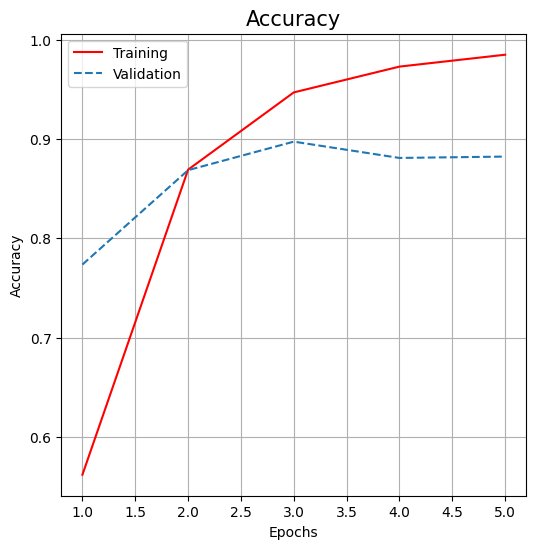

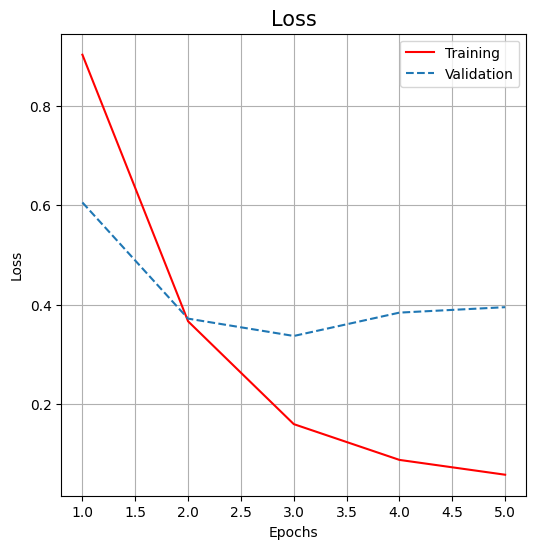

In [ ]:
get_plot(history)

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test2)
report = classification_report(Y_test2, y_pred.round())
print(report)

58/58 [==============================] - 7s 113ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       632
           1       0.88      0.80      0.84       568
           2       0.87      0.91      0.89       628

   micro avg       0.90      0.89      0.89      1828
   macro avg       0.90      0.89      0.89      1828
weighted avg       0.90      0.89      0.89      1828
 samples avg       0.89      0.89      0.89      1828



In [ ]:
y_pred1=model.predict(X_train2)
report1 = classification_report(Y_train2, y_pred1.round())
print(report1)

229/229 [==============================] - 26s 115ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2498
           1       0.98      0.95      0.96      2310
           2       0.96      0.97      0.97      2502

   micro avg       0.97      0.97      0.97      7310
   macro avg       0.97      0.97      0.97      7310
weighted avg       0.97      0.97      0.97      7310
 samples avg       0.97      0.97      0.97      7310



#Pickling the model

In [ ]:
import pickle

In [ ]:
from keras.models import save_model
model.save("model11.h5")
from tensorflow.keras.models import load_model
classifier = load_model('model11.h5')

In [ ]:
filenametoken = 'token.pkl'
pickle.dump(tokenizer, open(filenametoken, 'wb'))
token = pickle.load(open(filenametoken, 'rb'))


In [ ]:
def predict(text): #input is from forms
    Sentence = text
    text = token.texts_to_sequences(Sentence)
    text = pad_sequences(text, maxlen=250,dtype='int32', value=0)
    print(text)
    sentiment = classifier.predict(text,batch_size=1,verbose = 2)[0]
    print(sentiment)
    y_predicted = sentiment.flatten()
    y_predicted = np.where(y_predicted > 0.5, 1, 0)
    print(y_predicted)
    if y_predicted[0]==1:
      return "Negative"
    elif y_predicted[1]==1:
      return "Nuetral"
    elif y_predicted[2]==1:
      return "positive"
